In [1]:
# Contenido de ejercicios.ipynb - Celda 1

# Importamos las librerías esenciales para cálculo y visualización
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from sympy.abc import t, n, L, omega

## 📐 1. Cálculo Simbólico de Coeficientes de Fourier

### Objetivo
Utilizar la integración simbólica de SymPy para determinar los coeficientes de Fourier de una función periódica definida por partes.

**Ejercicio 1.1:** Calcule los coeficientes de la Serie de Fourier Trigonométrica para una **Onda Cuadrada Par** $f(t)$ con periodo $T=2L$, donde $L=\pi$.
$$f(t) = \begin{cases} 1 & 0 < t < \pi \\ -1 & -\pi < t < 0 \end{cases}$$

In [2]:
# Contenido de ejercicios.ipynb - Celda 3

# Definición del periodo L
L_val = sp.pi

# Definición de la función por partes para la integral (solo integramos de -L a L)
f_t = sp.Piecewise(
    (1, t > 0),
    (-1, t < 0)
)

print(f"Función f(t) es impar. Por simetría, los coeficientes an y a0 deben ser cero.")
print("-" * 30)

# 1. Coeficiente a0 (esperado: 0)
a0 = (1 / L_val) * (sp.integrate(f_t, (t, -L_val, L_val)))
print(f"a0 = {a0}")

# 2. Coeficiente an (esperado: 0)
# Multiplicador: cos(n*pi*t / L) = cos(n*t)
integrand_an = f_t * sp.cos(n * t)
an = (1 / L_val) * (sp.integrate(integrand_an, (t, -L_val, L_val)))
print(f"an = {an}")

# 3. Coeficiente bn (impar * impar = par. El resultado debe ser distinto de 0)
# Multiplicador: sin(n*pi*t / L) = sin(n*t)
integrand_bn = f_t * sp.sin(n * t)
bn_integral = (1 / L_val) * (sp.integrate(integrand_bn, (t, -L_val, L_val)))

# Simplificamos el resultado: bn = 4 / (n*pi) si n es impar, 0 si n es par
bn = sp.simplify(bn_integral)
print(f"bn = {bn}")

# Resultado simplificado final de bn:
# sp.sin(n*pi) es 0. sp.cos(n*pi) es (-1)^n.
bn_final = 2 / (n * sp.pi) * (1 - (-1)**n)
print(f"bn (forma más útil) = {bn_final}")

Función f(t) es impar. Por simetría, los coeficientes an y a0 deben ser cero.
------------------------------
a0 = 0
an = 0
bn = Piecewise((2*(1 - cos(pi*n))/(pi*n), ((n > -oo) | (n > 0)) & ((n > -oo) | (n < oo)) & ((n > 0) | (n < 0)) & ((n < 0) | (n < oo))), (0, n >= 0))
bn (forma más útil) = 2*(1 - (-1)**n)/(pi*n)


## 📈 2. Visualización de la Convergencia (Fenómeno de Gibbs)

### Objetivo
Simular la suma parcial de la serie de Fourier de la onda cuadrada para observar cómo converge la aproximación y cómo se manifiesta el **Fenómeno de Gibbs** en las discontinuidades.

**Serie de Fourier de la Onda Cuadrada ($L=\pi$):**
$$f(t) \approx \sum_{n=1, n \text{ impar}}^{N} \frac{4}{n\pi} \sin(nt)$$

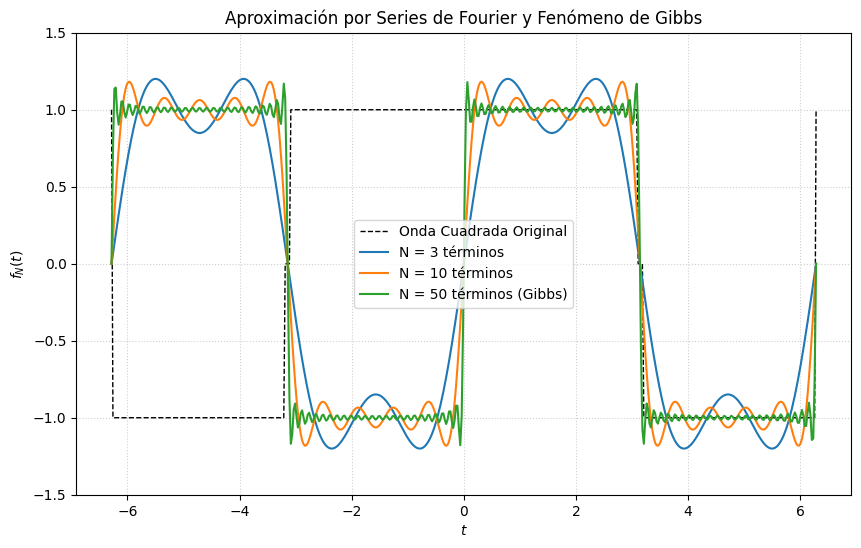

In [3]:
# Contenido de ejercicios.ipynb - Celda 5

# Definición de la función de suma parcial de la Serie de Fourier
def fourier_sum(t_vals, N_terms):
    """Calcula la suma parcial de la serie de Fourier para la onda cuadrada."""
    total_sum = np.zeros_like(t_vals, dtype=float)
    
    for n_val in range(1, N_terms + 1, 2):  # Solo n impar (1, 3, 5, ...)
        bn = 4 / (n_val * np.pi)
        total_sum += bn * np.sin(n_val * t_vals)
        
    return total_sum

# Rango de tiempo para la visualización
t_array = np.linspace(-2 * np.pi, 2 * np.pi, 500)

# Sumas con diferente número de términos (N)
N_low = 3
N_mid = 10
N_high = 50

sum_low = fourier_sum(t_array, N_low)
sum_mid = fourier_sum(t_array, N_mid)
sum_high = fourier_sum(t_array, N_high)

# Plotting
plt.figure(figsize=(10, 6))

# Trazar la función original (Onda Cuadrada real)
f_original = np.where(np.abs(t_array) % (2 * np.pi) <= np.pi, 1.0, -1.0)
f_original[np.abs(np.abs(t_array) % (2 * np.pi) - np.pi) < 0.05] = 0.0 # Puntos medios en el salto
plt.plot(t_array, f_original, 'k--', linewidth=1, label='Onda Cuadrada Original')

# Trazar las aproximaciones
plt.plot(t_array, sum_low, label=f'N = {N_low} términos')
plt.plot(t_array, sum_mid, label=f'N = {N_mid} términos')
plt.plot(t_array, sum_high, label=f'N = {N_high} términos (Gibbs)')

plt.title('Aproximación por Series de Fourier y Fenómeno de Gibbs')
plt.xlabel('$t$')
plt.ylabel('$f_N(t)$')
plt.ylim(-1.5, 1.5)
plt.legend()
plt.grid(True, linestyle=':', alpha=0.6)
plt.show()

## 💡 3. Cálculo de la Transformada de Fourier

### Objetivo
Utilizar la función `fourier_transform` de SymPy para calcular simbólicamente la Transformada de Fourier de una función.

**Ejercicio 3.1:** Calcule la Transformada de Fourier de la función Pulso Rectangular $f(t)$:
$$f(t) = \begin{cases} 1 & -a \leq t \leq a \\ 0 & \text{en otro caso} \end{cases}$$

In [6]:
# Contenido de ejercicios.ipynb - Celda 7 (Optimizado)

from sympy.abc import a, k

# Indicar a SymPy que 'a' es positivo y real, lo cual ayuda a la simplificación.
a = sp.Symbol('a', positive=True, real=True)
t = sp.Symbol('t', real=True)

# Definición de la función pulso rectangular
f_pulso = sp.Piecewise(
    (1, (t >= -a) & (t <= a)),
    (0, True)
)

# Cálculo de la Transformada de Fourier usando Integral directa
# Usando la convención: Integral( f(t) * exp(-i*k*t) dt )
F_k_integral = sp.integrate(f_pulso * sp.exp(-sp.I * k * t), (t, -sp.oo, sp.oo))

# Simplificación:
F_k_simplified = sp.simplify(F_k_integral)

print(f"Transformada F(k) Simplificada (Usando suposición a>0): {F_k_simplified}")

# Podemos reescribir F_k_simplified como:
print(f"Forma Sinc: {2 * a * sp.sinc(a * k)}")

# Confirma que F_k_simplified es igual a la forma Sinc
print(f"Equivalencia con Sinc (excepto en k=0): {sp.simplify(F_k_simplified - 2 * a * sp.sinc(a * k))}")

Transformada F(k) Simplificada (Usando suposición a>0): Piecewise((2*sin(a*k)/k, ((k > -oo) | (k > 0)) & ((k > -oo) | (k < oo)) & ((k > 0) | (k < 0)) & ((k < 0) | (k < oo))), (2*a, k >= 0))
Forma Sinc: 2*a*sinc(a*k)
Equivalencia con Sinc (excepto en k=0): Piecewise((2*(-a*sinc(a*k) + sin(a*k)/k), (k > 0) | (k < 0)), (2*a*(1 - sinc(a*k)), True))
